# IRBT Stock Prices Prediction

### Make sure to import all the libraries needed through out the application

In [17]:
import os
import pandas as pd
import urllib.request, json
import numpy as np
import tensorflow as tf

from datetime import datetime

### Download Data for Studying
- Download iRobot historical stock prices for the last 10 years (2008-2018) from yahoo financial
- Save downloaded data into a csv file and store locally

In [49]:
import pandas_datareader as pdr

financial_symbol = "IRBT"

def load_stock_data():
    # Save data to this file
    file_to_save = 'data/stock_data-%s.csv'%financial_symbol

    # Try to find the local data first -- if doesn't exist, download the new one
    if not os.path.exists(file_to_save):
        # Get the financial data with symbol "IRBT" using data reader
        data = pdr.get_data_yahoo(symbols=financial_symbol, start=datetime(2008, 1, 1), end=datetime(2018, 1, 1))
        data.to_csv(file_to_save)
        print('Data saved to : %s'%file_to_save)
    else:
        print('File already exists. Loading data from CSV')
    data = pd.read_csv(file_to_save)
    return data

# Sort the values to make sure we have sorted list by date increasingly
irbt = load_stock_data()
irbt.sort_values('Date')
irbt.head()

Data saved to : data/stock_data-IRBT.csv


,Date,High,Low,Open,Close,Volume,Adj Close
0,2008-01-02,18.400000,17.530001,18.120001,17.959999,187800,17.959999
1,2008-01-03,17.990000,17.500000,17.959999,17.670000,170600,17.670000
2,2008-01-04,17.670000,16.760000,17.610001,17.010000,354200,17.010000
3,2008-01-07,17.580000,17.059999,17.219999,17.379999,680800,17.379999
4,2008-01-08,18.450001,17.219999,17.219999,17.730000,503500,17.730000


### Visualizing Data
- Describing what the data looks like
- Display all the data as a graph to see how the stock prices looks like overall for the last 10 years

In [9]:
# Describing data set
irbt.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2519.000000,2519.000000,2519.000000,2519.000000,2.519000e+03,2519.000000
mean,32.090802,30.972025,31.538746,31.531385,4.048367e+05,31.531385
std,19.050505,18.453830,18.778203,18.749163,5.280193e+05,18.749163
min,7.290000,7.000000,7.110000,7.100000,1.270000e+04,7.100000
25%,19.100000,18.280001,18.665000,18.675000,1.573500e+05,18.675000
50%,30.889999,29.930000,30.370001,30.350000,2.776000e+05,30.350000
75%,36.030001,34.924999,35.495001,35.465000,4.697500e+05,35.465000
max,109.779999,104.580002,107.820000,107.250000,8.239400e+06,107.250000


In [11]:
# Infomation of the data set
irbt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2519 entries, 2008-01-02 to 2018-01-02
Data columns (total 6 columns):
High         2519 non-null float64
Low          2519 non-null float64
Open         2519 non-null float64
Close        2519 non-null float64
Volume       2519 non-null int64
Adj Close    2519 non-null float64
dtypes: float64(5), int64(1)
memory usage: 137.8 KB


Looking at the information alone, we can see that there are 2519 entries total and there is 2519 entries for each and every entries. Thus, it's safe to say that we have a good data set since no entry is missing.

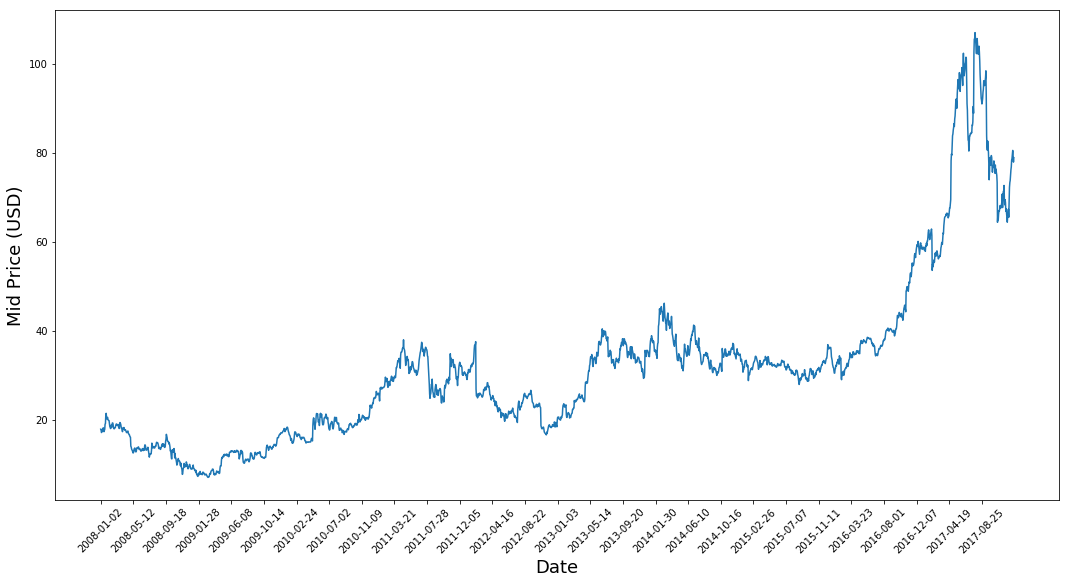

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,9))
plt.plot(range(irbt.shape[0]),(irbt['Low'] + irbt['High'])/2.0)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price (USD)',fontsize=18)

# Sticks for every 3 months
plt.xticks(range(0,irbt.shape[0],90), irbt['Date'].loc[::90], rotation=45)
plt.show()

### Splitting Data into Training Set and Test Set
- Taking about 30% amount of data to be the training data, the rest will be used as test data.
- Also, we want to avoid making the ML algorithms gets to see the whole data set. Thus, we need to randomly load a subsequence of 30% amount of data

In [56]:
from sklearn.model_selection import train_test_split

# First calculate the mid prices from the highest and lowest
high_prices = irbt.loc[:,'High'].values
low_prices = irbt.loc[:,'Low'].values
mid_prices = (high_prices + low_prices)/2.0

train_set, test_set = train_test_split(mid_prices, test_size=0.3, random_state=42)